## The Android App Market on Google Play





## Project Description

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this project, you will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. You'll look for insights in the data to devise strategies to drive growth and retention. The data for this project was scraped from the Google Play website. While there are many popular datasets for Apple App Store, there aren't many for Google Play apps, which is partially due to the increased difficulty in scraping the latter as compared to the former. The data files are as follows:

    apps.csv : contains all the details of the apps on Google Play. These are the features that describe an app.
    user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed, passed through a sentiment analyzer engine and tagged with its sentiment score.


## Guided Project

Through a series of guided steps, harness your complete data analyst toolbox to perform data wrangling, create visualizations, and carry out a descriptive and inferential analysis.

## Project Tasks

    1. Google Play Store apps and reviews
    
    2. Data cleaning
    
    3. Correcting data types
    
    4. Exploring app categories
    
    5. Distribution of app ratings
    
    6. Size and price of an app
    
    7. Relation between app category and app price
    
    8. Filter out "junk" apps
    
    9. Popularity of paid apps vs free apps
    
    10. Sentiment analysis of user reviews
    

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.


Let's take a look at the data, which consists of two files:

    apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
    user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.


In [1]:
import pandas as pd


# # Read in dataset
#####################################################################################################################
apps = pd.read_csv('apps.csv')
#print(apps.head(3))
print('\n')

reviews = pd.read_csv('user_reviews.csv')
#print(reviews.head())


# Drop duplicates
#####################################################################################################################
print('before apps.drop_duplicate, ' + str(len(apps)))
apps = apps.drop_duplicates()
print('after apps.drop_duplicate, ' + str(len(apps)))

print('before reviews.drop_duplicate, ' + str(len(reviews)))
reviews = reviews.drop_duplicates()
print('after reviews.drop_duplicate, ' + str(len(reviews)))

print('\n')



# Have a look at a random sample of 5 rows
#####################################################################################################################
print(apps.sample(5))


# By default, it drop_duplicate rows based on all columns.  all column value of one row equal to another row
# To remove duplicates on specific column(s), use 'subset=col_name'.  drop rows if subset columns value are same 
#####################################################################################################################



before apps.drop_duplicate, 9659
after apps.drop_duplicate, 9659
before reviews.drop_duplicate, 64295
after reviews.drop_duplicate, 30679


      Unnamed: 0                         App         Category  Rating  \
9495       10672            FNH Payment Info    COMMUNICATION     NaN   
1671        2138            Frozen Free Fall           FAMILY     4.3   
2657        3386  OnePlus Icon Pack - Square  PERSONALIZATION     4.7   
5130        6126           Cute Questions BF        LIFESTYLE     4.0   
8897       10057  GLASS GO Launcher EX Theme  PERSONALIZATION     4.2   

      Reviews  Size     Installs  Type Price Content Rating  \
9495        0  2.1M          10+  Free     0       Everyone   
1671  1574197   37M  50,000,000+  Free     0       Everyone   
2657      229  1.1M     500,000+  Free     0       Everyone   
5130        3  3.3M       1,000+  Free     0       Everyone   
8897    18280  6.0M   1,000,000+  Free     0       Everyone   

                         Genres     Last

## 2. Data cleaning

The three features that we will be working with most frequently henceforth are Installs, Size, and Price. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.


In [3]:
print(help(str.replace))
#print('\n')

#print(help(pd.to_numeric))

Help on method_descriptor:

replace(self, old, new, count=-1, /)
    Return a copy with all occurrences of substring old replaced by new.
    
      count
        Maximum number of occurrences to replace.
        -1 (the default value) means replace all occurrences.
    
    If the optional argument count is given, only the first count occurrences are
    replaced.

None


In [2]:
# List of characters to remove
characters = [',', '$', '+', 'M', 'k']

# List of column names to clean
columns = ['Installs', 'Size', 'Price']


for i in columns:
    for c in characters:
        apps[i] = apps[i].str.replace(c, '', regex=True)
        #############################################################################################################
        #############################################################################################################
    
    apps[i] = pd.to_numeric(apps[i])


print(apps.sample(5))

print(type(apps['Price'][12]))
print(type(apps['Installs'][12]))
print(type(apps['Size'][32]))

      Unnamed: 0                                               App Category  \
1966        2491                                         IHSS Help  MEDICAL   
3423        4313                      Discovery K!ds Play! Español   FAMILY   
4351        5306                                        GUN ZOMBIE     GAME   
8030        9150                                    Dungeon Keeper   FAMILY   
2027        2569  SPARK - Live random video chat & meet new people   SOCIAL   

      Rating  Reviews  Size  Installs  Type  Price Content Rating  \
1966     4.7       10   4.3      1000  Free    0.0       Everyone   
3423     4.2    11263  35.0   1000000  Free    0.0       Everyone   
4351     4.4   243121  38.0   5000000  Free    0.0           Teen   
8030     4.0    69574  45.0    500000  Free    0.0   Everyone 10+   
2027     4.6    79658  17.0   5000000  Free    0.0     Mature 17+   

                           Genres      Last Updated Current Ver   Android Ver  
1966                      Medi

## 3. Exploring app categories

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:

    Which category has the highest share of (active) apps in the market?
    Is any specific category dominating the market?
    Which categories have the fewest number of apps?

We will see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

                      App  % of Total
Category                             
FAMILY               1832       18.97
GAME                  959        9.93
TOOLS                 827        8.56
BUSINESS              420        4.35
MEDICAL               395        4.09
PERSONALIZATION       376        3.89
PRODUCTIVITY          374        3.87
LIFESTYLE             369        3.82
FINANCE               345        3.57
SPORTS                325        3.36
COMMUNICATION         315        3.26
HEALTH_AND_FITNESS    288        2.98
PHOTOGRAPHY           281        2.91
NEWS_AND_MAGAZINES    254        2.63
SOCIAL                239        2.47
BOOKS_AND_REFERENCE   222        2.30
TRAVEL_AND_LOCAL      219        2.27
SHOPPING              202        2.09
DATING                171        1.77
VIDEO_PLAYERS         163        1.69
MAPS_AND_NAVIGATION   131        1.36
EDUCATION             119        1.23
FOOD_AND_DRINK        112        1.16
ENTERTAINMENT         102        1.06
AUTO_AND_VEH

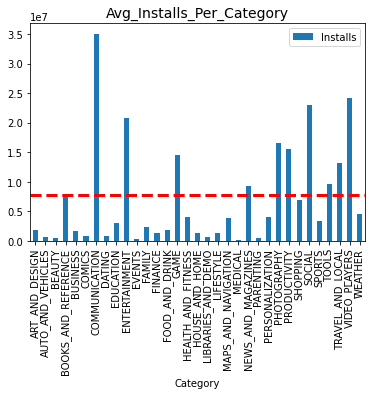

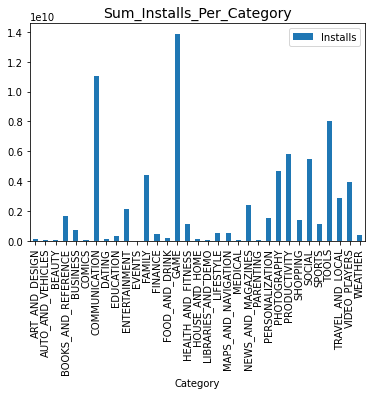

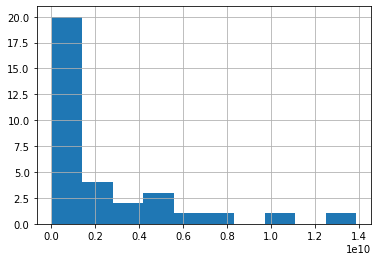

In [13]:
import matplotlib.pyplot as plt
import numpy as np

app_count_table = apps.pivot_table(values='App', 
                       index='Category', 
                       aggfunc=lambda x: len(x.unique())).sort_values('App', ascending=False)
                       ##############################################################################################
app_count_table['% of Total'] = round((app_count_table['App'] / app_count_table['App'].sum() * 100), 2)
print(app_count_table)


table = apps.pivot_table(values='Installs', 
                       index='Category', 
                       aggfunc=np.sum).sort_values('Installs', ascending=False)#.div(sum(index))

#####################################################################################################################
table['% of Total'] = round((table['Installs'] / table['Installs'].sum() * 100), 2)
print(table)


#    Which category has the highest share of (active) apps in the market?
        # I take Install numbers representing share of (active) apps, thus Games has highest share 14.7%
    
#    Is any specific category dominating the market?
        # Yes, Games 18.5%, Communication 14.7%, Tools 10.7%, all others less are than 7.7%

#    Which categories have the fewest number of apps?
        # I take this as count of App group by each categories, so its Beauty

#####################################################################################################################
#####################################################################################################################



#                                                   , aggfunc=np.sum
apps.pivot_table(values='Installs', index='Category').plot(kind='bar')
plt.title('Avg_Installs_Per_Category', fontsize=14)
# use axhline to add Avg line in the bar plot
#####################################################################################################################
plt.axhline(apps['Installs'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.show()


apps.pivot_table(values='Installs', index='Category', aggfunc=np.sum).plot(kind='bar')
plt.title('Sum_Installs_Per_Category', fontsize=14)
plt.show()


                                                      ###############################################################
apps.groupby('Category')['Installs'].sum().hist()     ### Understand what we want and imagine the outcome of code
plt.show()                                            ###############################################################

## 4. Distribution of app ratings

After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the right indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

      Unnamed: 0                                   App             Category  \
120          120  Beauty Tips - Beauty Tips in Sinhala               BEAUTY   
9170       10342                        La Fe de Jesus  BOOKS_AND_REFERENCE   
3732        4648        U Camera : Phone 6s OS 9 style          PHOTOGRAPHY   
6372        7419                CJ's Tire & Automotive    AUTO_AND_VEHICLES   
4646        5627             Five Nights at Freddy's 2               FAMILY   

      Rating  Reviews    Size  Installs  Type  Price Content Rating  \
120      4.4       75   4.200     50000  Free   0.00       Everyone   
9170     NaN        8   0.658      1000  Free   0.00       Everyone   
3732     4.2     2158   3.000    500000  Free   0.00       Everyone   
6372     4.0        5  34.000      1000  Free   0.00       Everyone   
4646     4.6    73919  40.000    500000  Paid   2.99           Teen   

                 Genres       Last Updated Current Ver   Android Ver  Size_bin  
120              

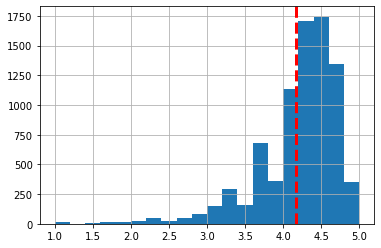

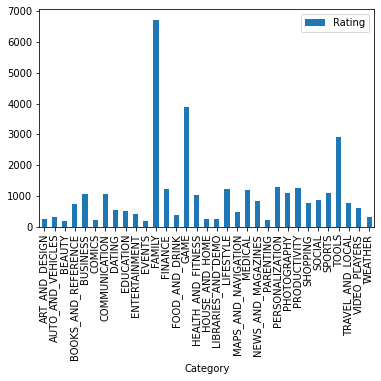

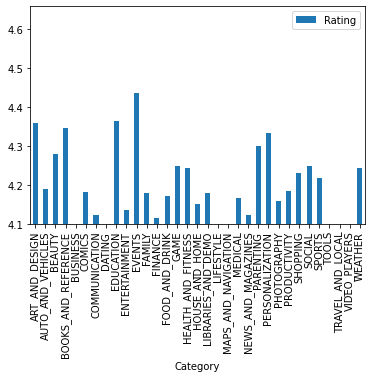

In [30]:
print(apps.sample(5))


print(apps.isna().sum())
print(apps['Rating'].mean())


# How all these apps perform on an average
import matplotlib.pyplot as plt

apps['Rating'].hist(bins=20)
#####################################################################################################################
plt.axvline(apps['Rating'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.show()



# Distribution of apps according to their ratings
# Vertical dashed line to indicate the average app rating




import matplotlib.pyplot as plt
import numpy as np

apps.pivot_table(values='Rating', index='Category', aggfunc=np.sum).plot(kind='bar')
plt.show()


apps.pivot_table(values='Rating', index='Category', aggfunc=np.mean).plot(kind='bar')
plt.ylim(bottom=4.1)
plt.show()

## 5. Size and price of an app

# *******************************************************************************************************************
# *******************************************************************************************************************
Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

# How can we effectively come up with strategies to size and price our app?

    Does the size of an app affect its rating?
    Do users really care about system-heavy apps or do they prefer light-weighted apps?
    Does the price of an app affect its rating?
    Do users always prefer free apps over paid apps?

# We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under $10.

459
             Installs  % of total
Size_bin                         
(0, 5]     1759597376        5.60
(5, 10]    2634697439        8.39
(10, 15]   4179376231       13.31
(15, 20]   2078387134        6.62
(20, 25]   2448212768        7.80
(25, 30]   1256613066        4.00
(30, 35]   1469431371        4.68
(35, 40]   1672446485        5.33
(40, 45]   1063697896        3.39
(45, 50]   1445596005        4.60
(50, 55]   1667586166        5.31
(55, 60]   1463259300        4.66
(60, 65]   1362986131        4.34
(65, 70]   1516133270        4.83
(70, 75]   1002497716        3.19
(75, 80]   1639461350        5.22
(80, 85]    397671660        1.27
(85, 90]    350482520        1.12
(90, 95]    678174450        2.16
(95, 100]  1316249170        4.19


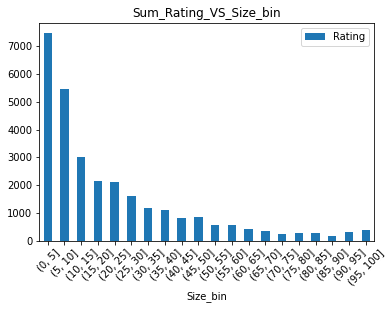

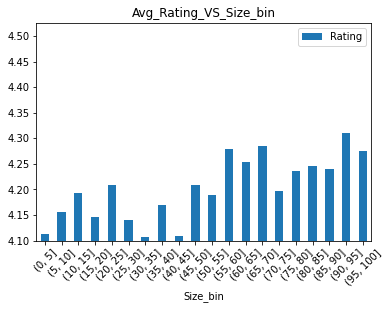

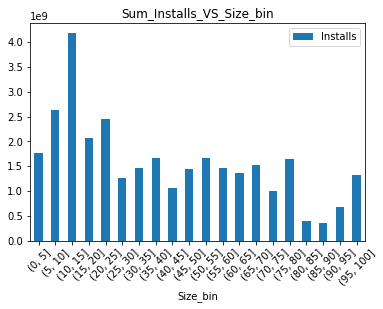

/tmp/ipykernel_35849/1104468393.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over_4_app['Size_bin2'] = pd.cut(over_4_app['Size'], range(0, round(over_4_app['Size'].max()), 3))


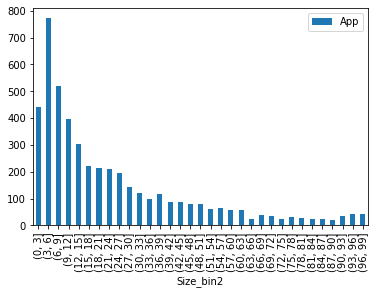

In [54]:
#    Does the size of an app affect its rating?
        # yes, Size 5-25 group seems more popular - more total Installs, higher total Rating
    
#    Do users really care about system-heavy apps or do they prefer light-weighted apps?
        # if so, the Rating or Install should be significant diff with Size change, yes 10-25 seems really popular
    
#    Does the price of an app affect its rating?
        # same thingas above, just change Size to price, and read the plot
    
#    Do users always prefer free apps over paid apps?
        # same, just group into two, or draw two plot together
    
#####################################################################################################################
#####################################################################################################################

import matplotlib.pyplot as plt


#apps.fillna(0)

print(len(apps.pivot_table(values='Rating', index='Size', aggfunc=np.sum)))


bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
#####################################################################################################################
apps['Size_bin'] = pd.cut(apps['Size'], bins)
#print(apps.sample(15))

size_bin_install_table = apps.pivot_table(values='Installs', index='Size_bin', aggfunc=np.sum)
size_bin_install_table['% of total'] = round(size_bin_install_table['Installs']/
                                             size_bin_install_table['Installs'].sum()*100, 2)
print(size_bin_install_table)  # .sort_values('% of total', ascending=False)



apps.pivot_table(values='Rating', index='Size_bin', aggfunc=np.sum).plot(kind='bar', rot=45)
plt.title('Sum_Rating_VS_Size_bin')
plt.show()

apps.pivot_table(values='Rating', index='Size_bin', aggfunc=np.mean).plot(kind='bar', rot=45)
plt.title('Avg_Rating_VS_Size_bin')
#####################################################################################################################
plt.ylim(bottom=4.1)
plt.show()


apps.pivot_table(values='Installs', index='Size_bin', aggfunc=np.sum).plot(kind='bar', rot=45)
#####################################################################################################################
plt.title('Sum_Installs_VS_Size_bin')
plt.show()





#???????????????????????????????????????????????????????????????????????????????????????????
# We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. 
# We also find that the vast majority of apps price themselves under $10.

over_4_app = apps[(apps['Rating']>4) & (apps['Size']>1)]
### Guess we should also filter apps Install>1000 or something,  but here I chose Size > 1 MB
#####################################################################################################################

over_4_app['Size_bin2'] = pd.cut(over_4_app['Size'], range(0, round(over_4_app['Size'].max()), 3))

over_4_app.pivot_table(values='App', index='Size_bin2', 
                       aggfunc=lambda x: len(x.unique())).plot(kind='bar')   # , figsize=(85,8)
plt.show()


## 6. Relation between app category and app price

So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to $80! All game apps are reasonably priced below $20.